### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

### Data Collection

In [2]:
data = pd.read_csv('car_data.csv')

In [3]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
data.shape

(301, 9)

### Data Preprocessing

In [5]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

<Axes: xlabel='Fuel_Type', ylabel='count'>

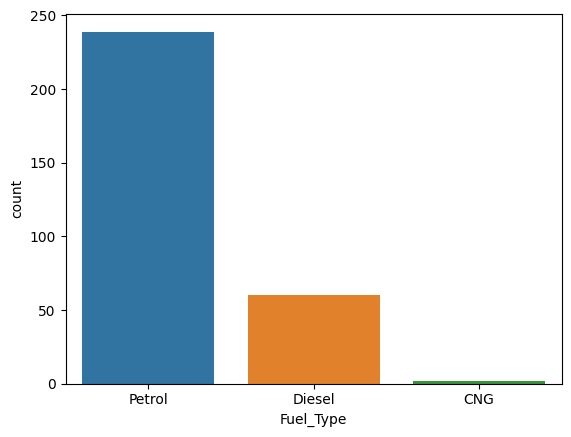

In [8]:
sns.countplot(x = 'Fuel_Type',data = data)

<Axes: xlabel='Seller_Type', ylabel='count'>

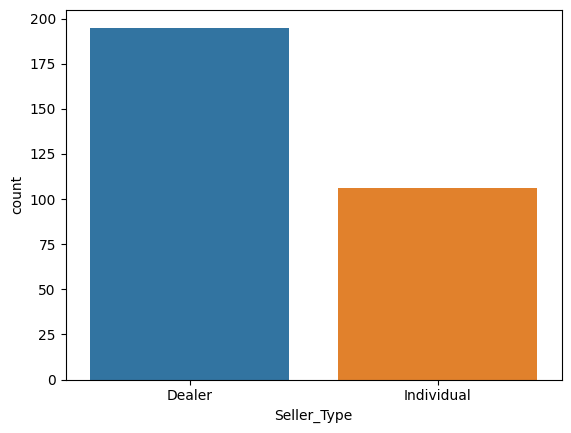

In [9]:
sns.countplot(x = 'Seller_Type',data = data)

<Axes: xlabel='Transmission', ylabel='count'>

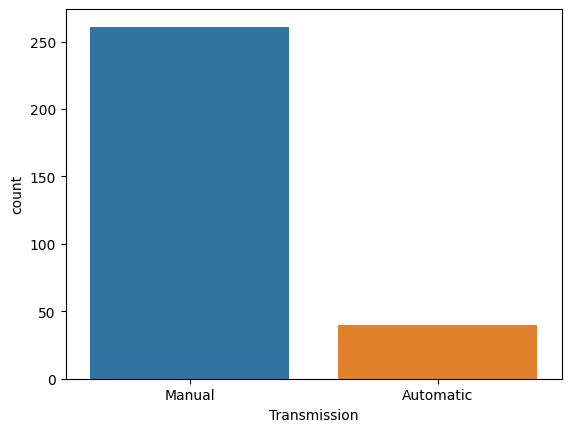

In [10]:
sns.countplot(x = 'Transmission',data = data)

In [11]:
data1 = data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2},
                     'Seller_Type':{'Dealer':0,'Individual':1},
                     'Transmission':{'Manual':0,'Automatic':1}})

In [12]:
data1.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [13]:
X = data1.drop(['Car_Name','Selling_Price'],axis = 1)
y = data1.Selling_Price

In [14]:
print(X.shape)
print(y.shape)

(301, 7)
(301,)


In [15]:
scaler = MinMaxScaler()

In [16]:
scaled_data = scaler.fit_transform(X)

In [17]:
scaled_data[0]

array([0.73333333, 0.0571088 , 0.05305305, 0.        , 0.        ,
       0.        , 0.        ])

### Train_Test_Splits

In [18]:
x_train,x_test,y_train,y_test = train_test_split(scaled_data, y, test_size = 0.2)

In [19]:
x_train.shape

(240, 7)

In [20]:
y_train.shape

(240,)

In [21]:
x_test.shape

(61, 7)

In [22]:
y_test.shape

(61,)

### Models Training with GridSearchCV

In [23]:
import pickle
import pandas as pd
from sklearn.model_selection import ShuffleSplit, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

def gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {}
        },
        'ridge_regression': {
            'model': Ridge(),
            'params': {
                'alpha': [0.1, 1.0, 10.0]
            }
        },
        'lasso_regression': {
            'model': Lasso(),
            'params': {
                'alpha': [0.1, 1.0, 10.0]
            }
        },
        'random_forest_regression': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [100, 200, 300],
                'max_depth': [None, 10, 20, 30],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4]
            }
        },
        'gradient_boosting_regression': {
            'model': GradientBoostingRegressor(),
            'params': {
                'n_estimators': [100, 200, 300],
                'learning_rate': [0.05, 0.1, 0.2],
                'max_depth': [3, 4, 5],
                'min_samples_split': [2, 5, 10]
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gscv = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gscv.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gscv.best_score_,
            'best_params': gscv.best_params_
        })
        best_estimator = gscv.best_estimator_
        pickle.dump(best_estimator, open(f'{algo_name}_model.p', 'wb'))

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

In [24]:
stats = gridsearchcv(x_train,y_train)

In [25]:
stats.to_csv('stats.csv')

In [26]:
stats

,model,best_score,best_params
0,linear_regression,0.808883,{}
1,ridge_regression,0.857904,{'alpha': 0.1}
2,lasso_regression,0.797864,{'alpha': 0.1}
3,random_forest_regression,0.884671,"{'max_depth': 30, 'min_samples_leaf': 1, 'min_..."
4,gradient_boosting_regression,0.940192,"{'learning_rate': 0.2, 'max_depth': 5, 'min_sa..."


### Models Evaluation

#### Linear Regression Model Evaluation

In [27]:
with open('linear_regression_model.p', 'rb') as file:
    model1 = pickle.load(file)

In [28]:
model1.score(x_train,y_train)

0.8802311190703636

In [29]:
model1.score(x_test,y_test)

0.8117591462843353

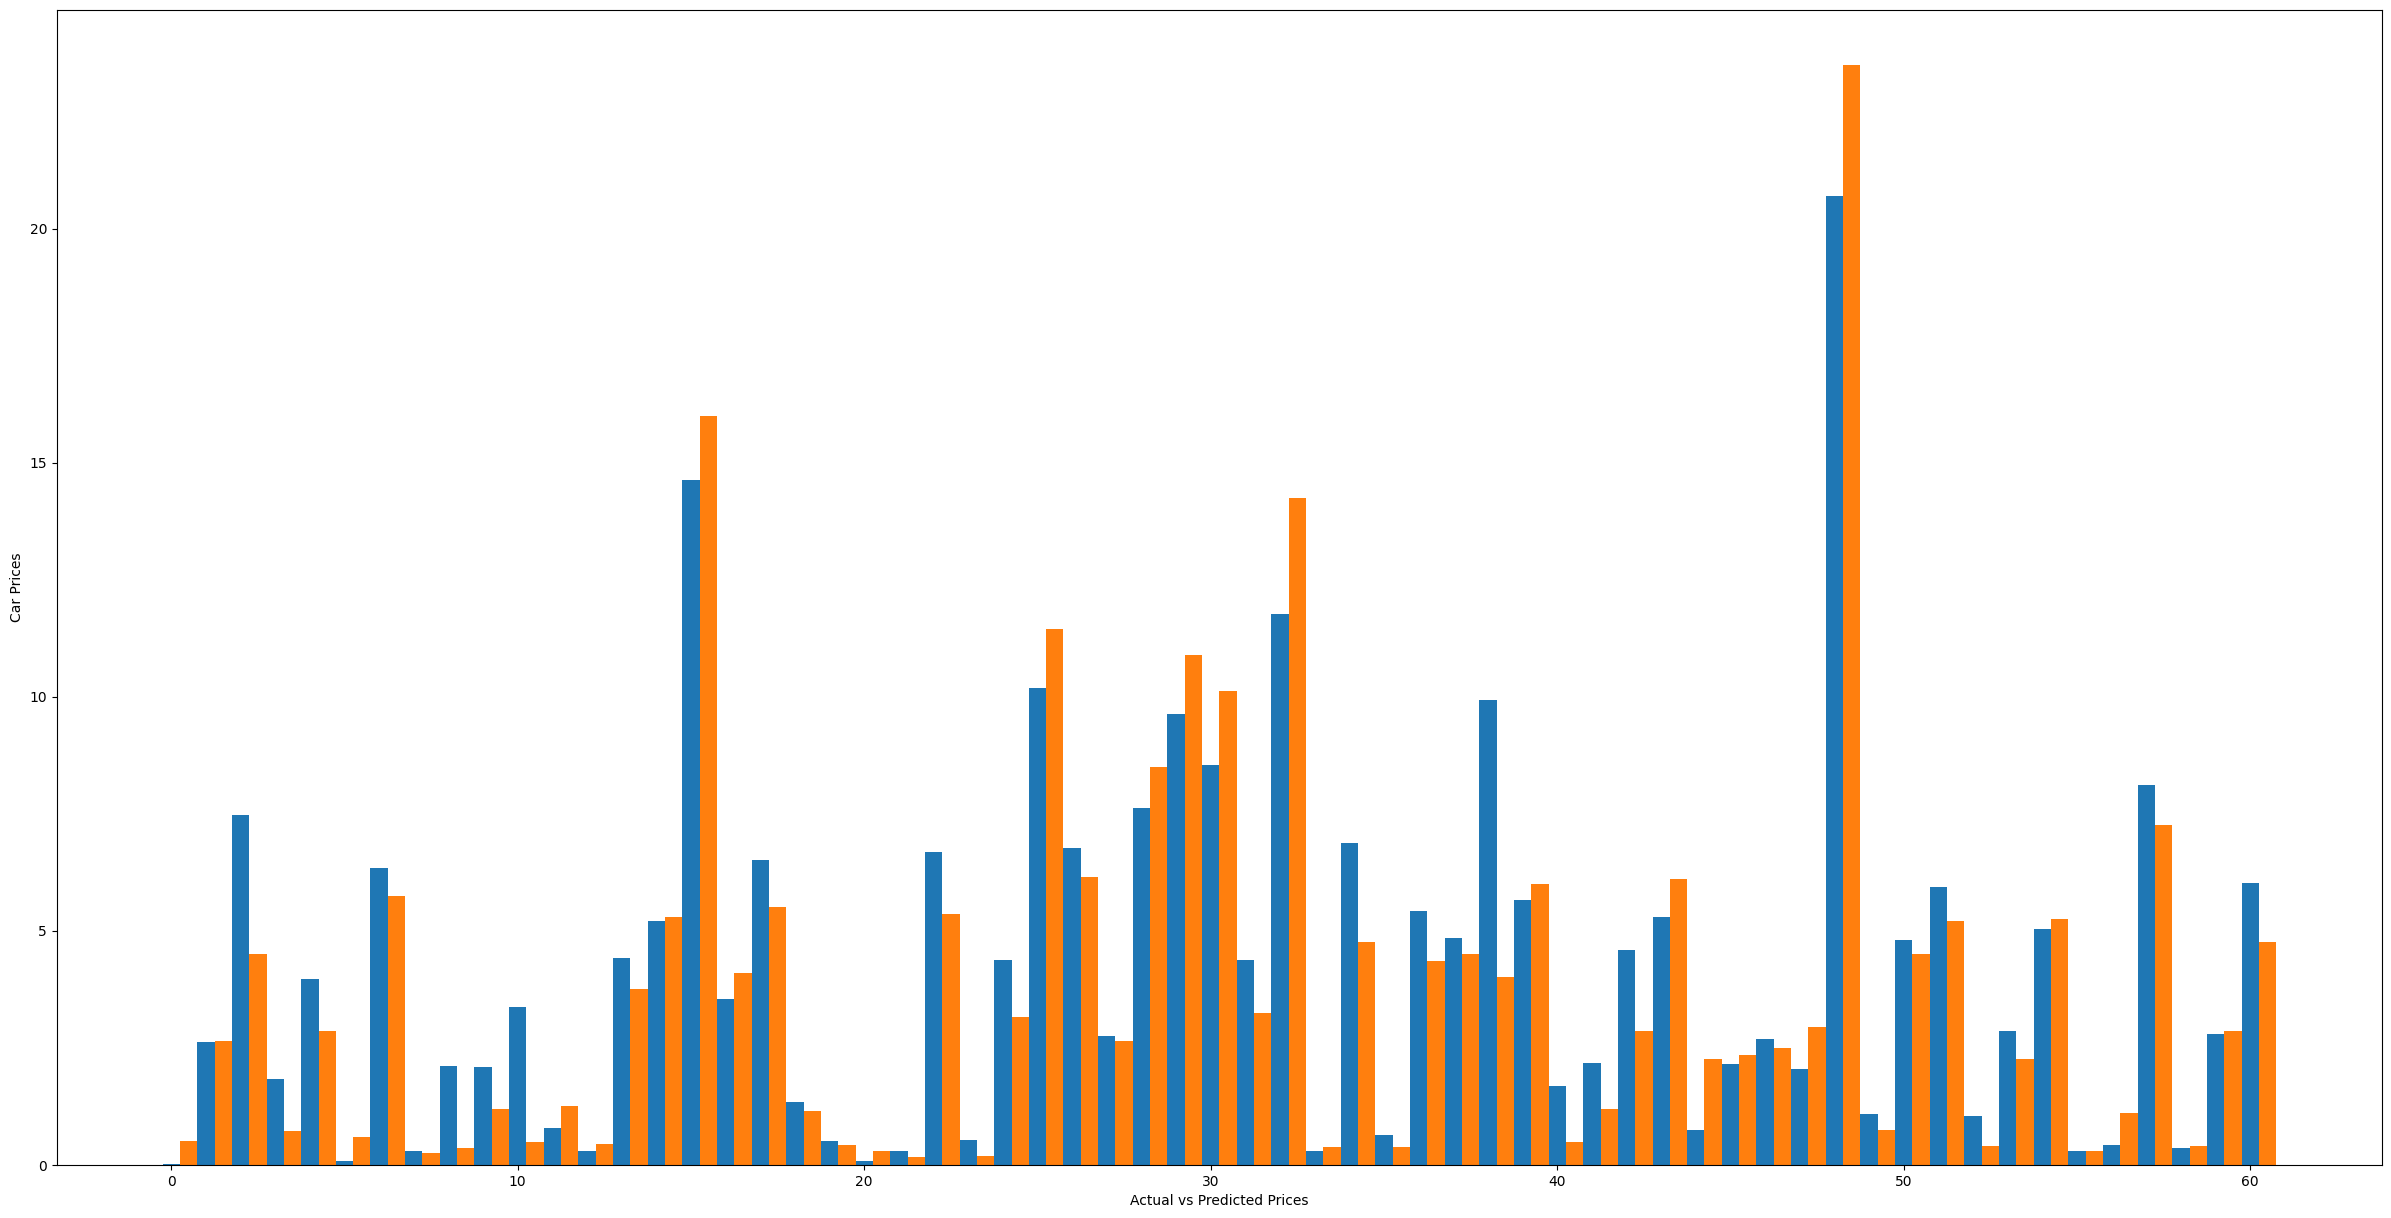

In [33]:
y_true = list(y_test)
prediction = list(model1.predict(x_test))
y_predict = []
for x in prediction:
    if x<0:
        y_predict.append(0.3)
        continue
    y_predict.append(x)
    
ind = np.arange(61)
plt.figure(figsize = (30,15))

width = 0.5

plt.bar(ind,y_predict,width,label = 'Predicted Car Price')
plt.bar(ind+width,y_true,width,label = 'Actual Car Price')

plt.xlabel('Actual vs Predicted Prices')
plt.ylabel('Car Prices')

plt.show()

#### Lasso Regression Model Evaluation

In [34]:
with open('lasso_regression_model.p', 'rb') as file:
    model2 = pickle.load(file)

In [35]:
model2.score(x_train,y_train)

0.8154043413078791

In [36]:
model2.score(x_test,y_test)

0.8185795541204148

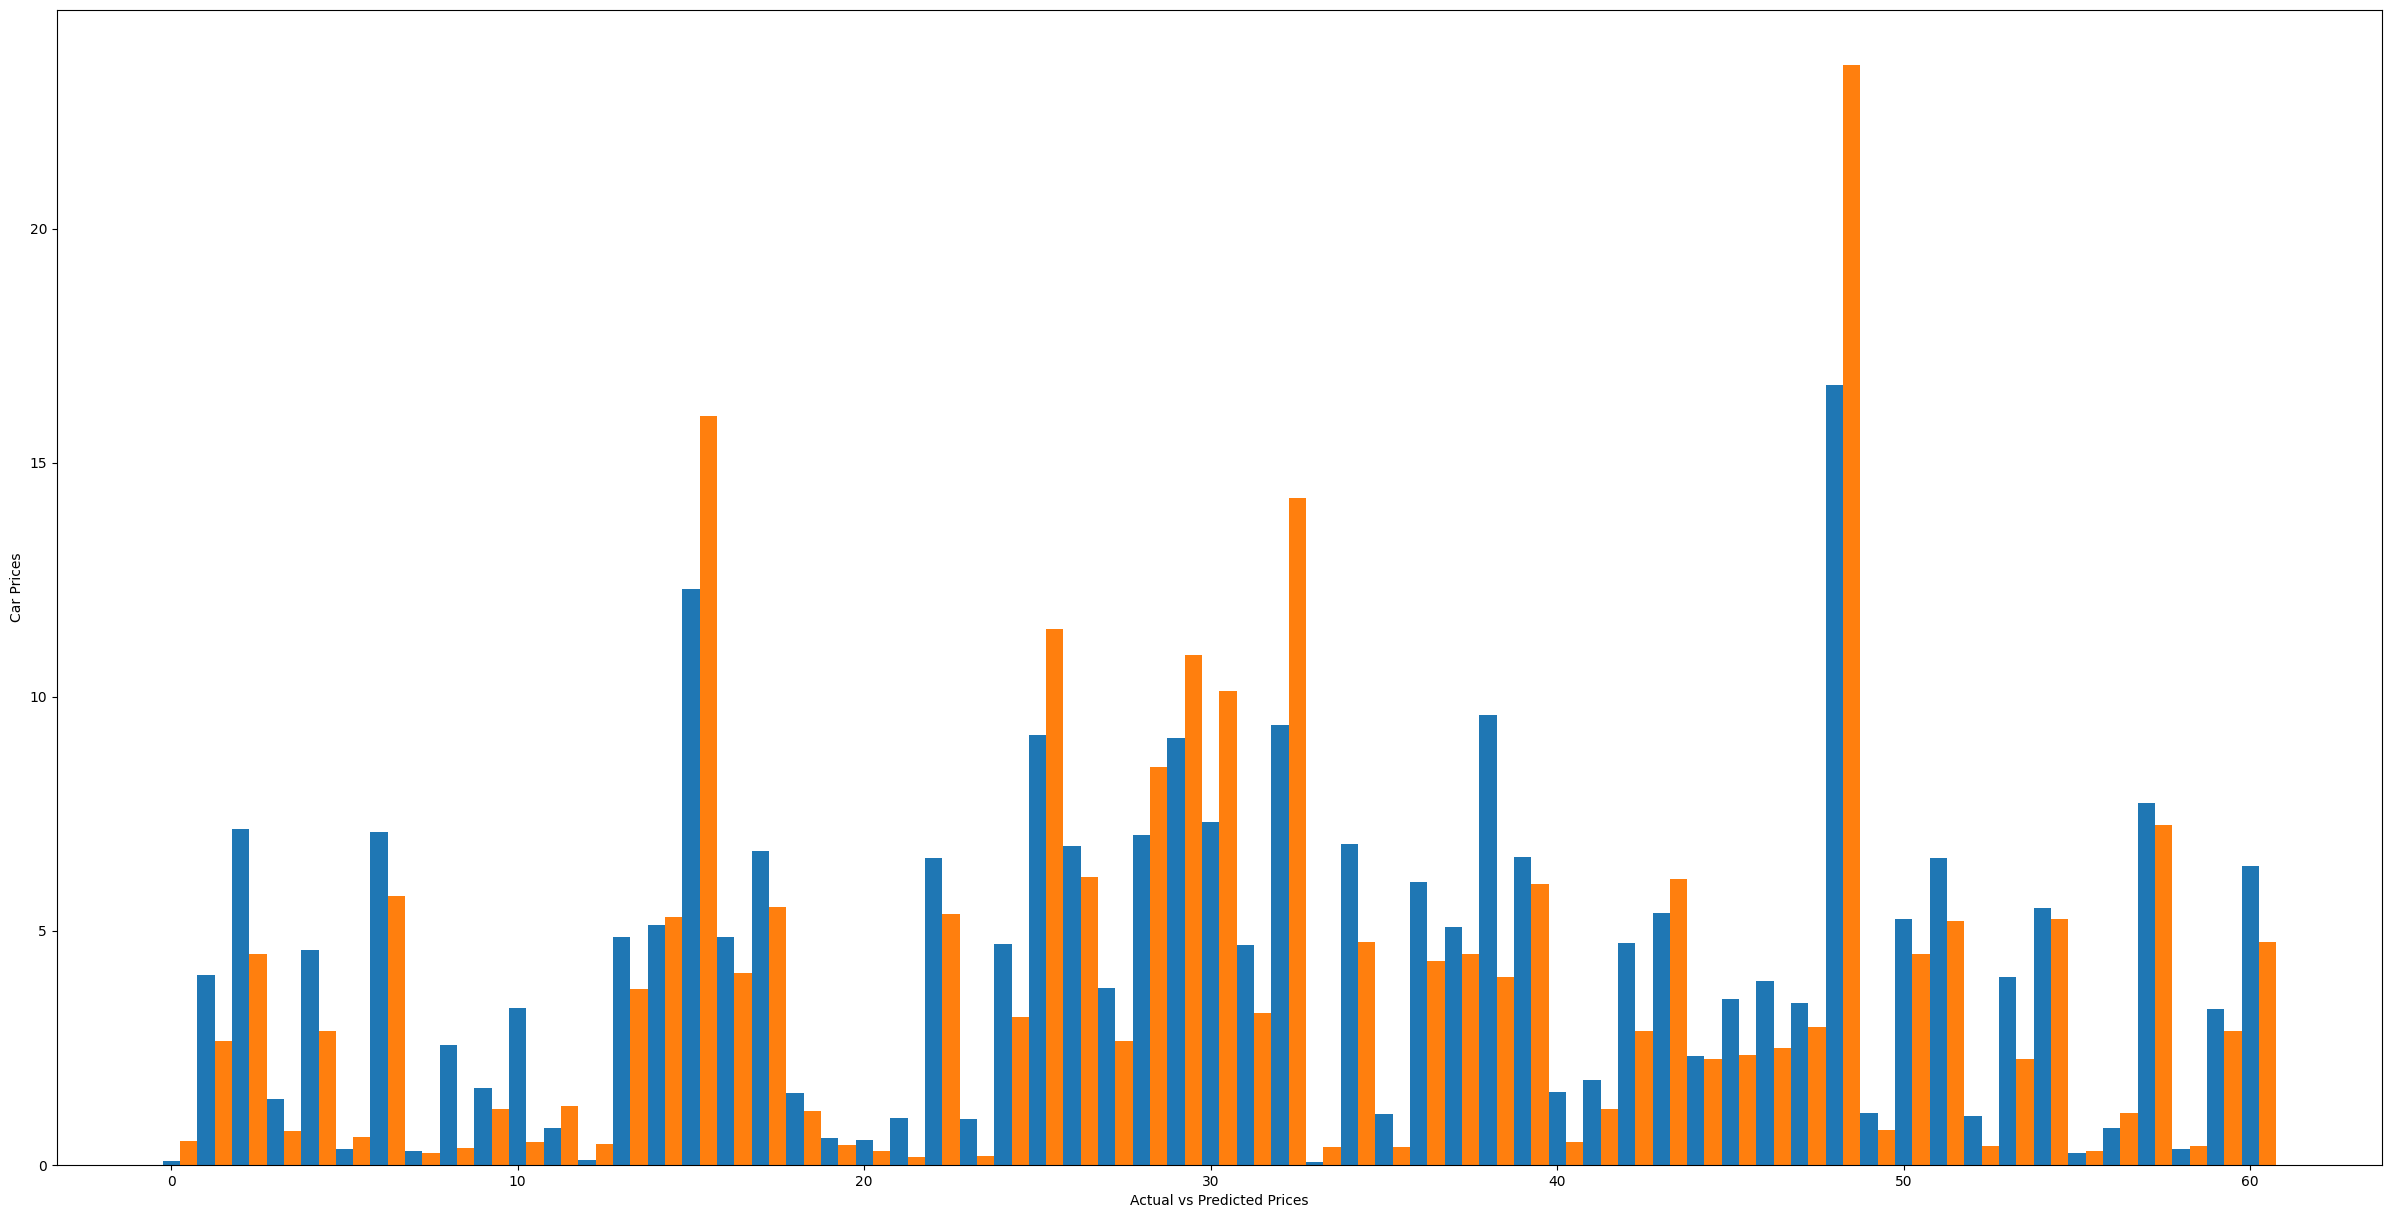

In [37]:
y_true = list(y_test)
prediction = list(model2.predict(x_test))
y_predict = []
for x in prediction:
    if x<0:
        y_predict.append(0.3)
        continue
    y_predict.append(x)
    
ind = np.arange(61)
plt.figure(figsize = (30,15))

width = 0.5

plt.bar(ind,y_predict,width,label = 'Predicted Car Price')
plt.bar(ind+width,y_true,width,label = 'Actual Car Price')

plt.xlabel('Actual vs Predicted Prices')
plt.ylabel('Car Prices')

plt.show()

#### Ridge Regression Model Evaluation

In [38]:
with open('ridge_regression_model.p', 'rb') as file:
    model3 = pickle.load(file)

In [39]:
model3.score(x_train,y_train)

0.8782339289192597

In [40]:
model3.score(x_test,y_test)

0.8396023356622695

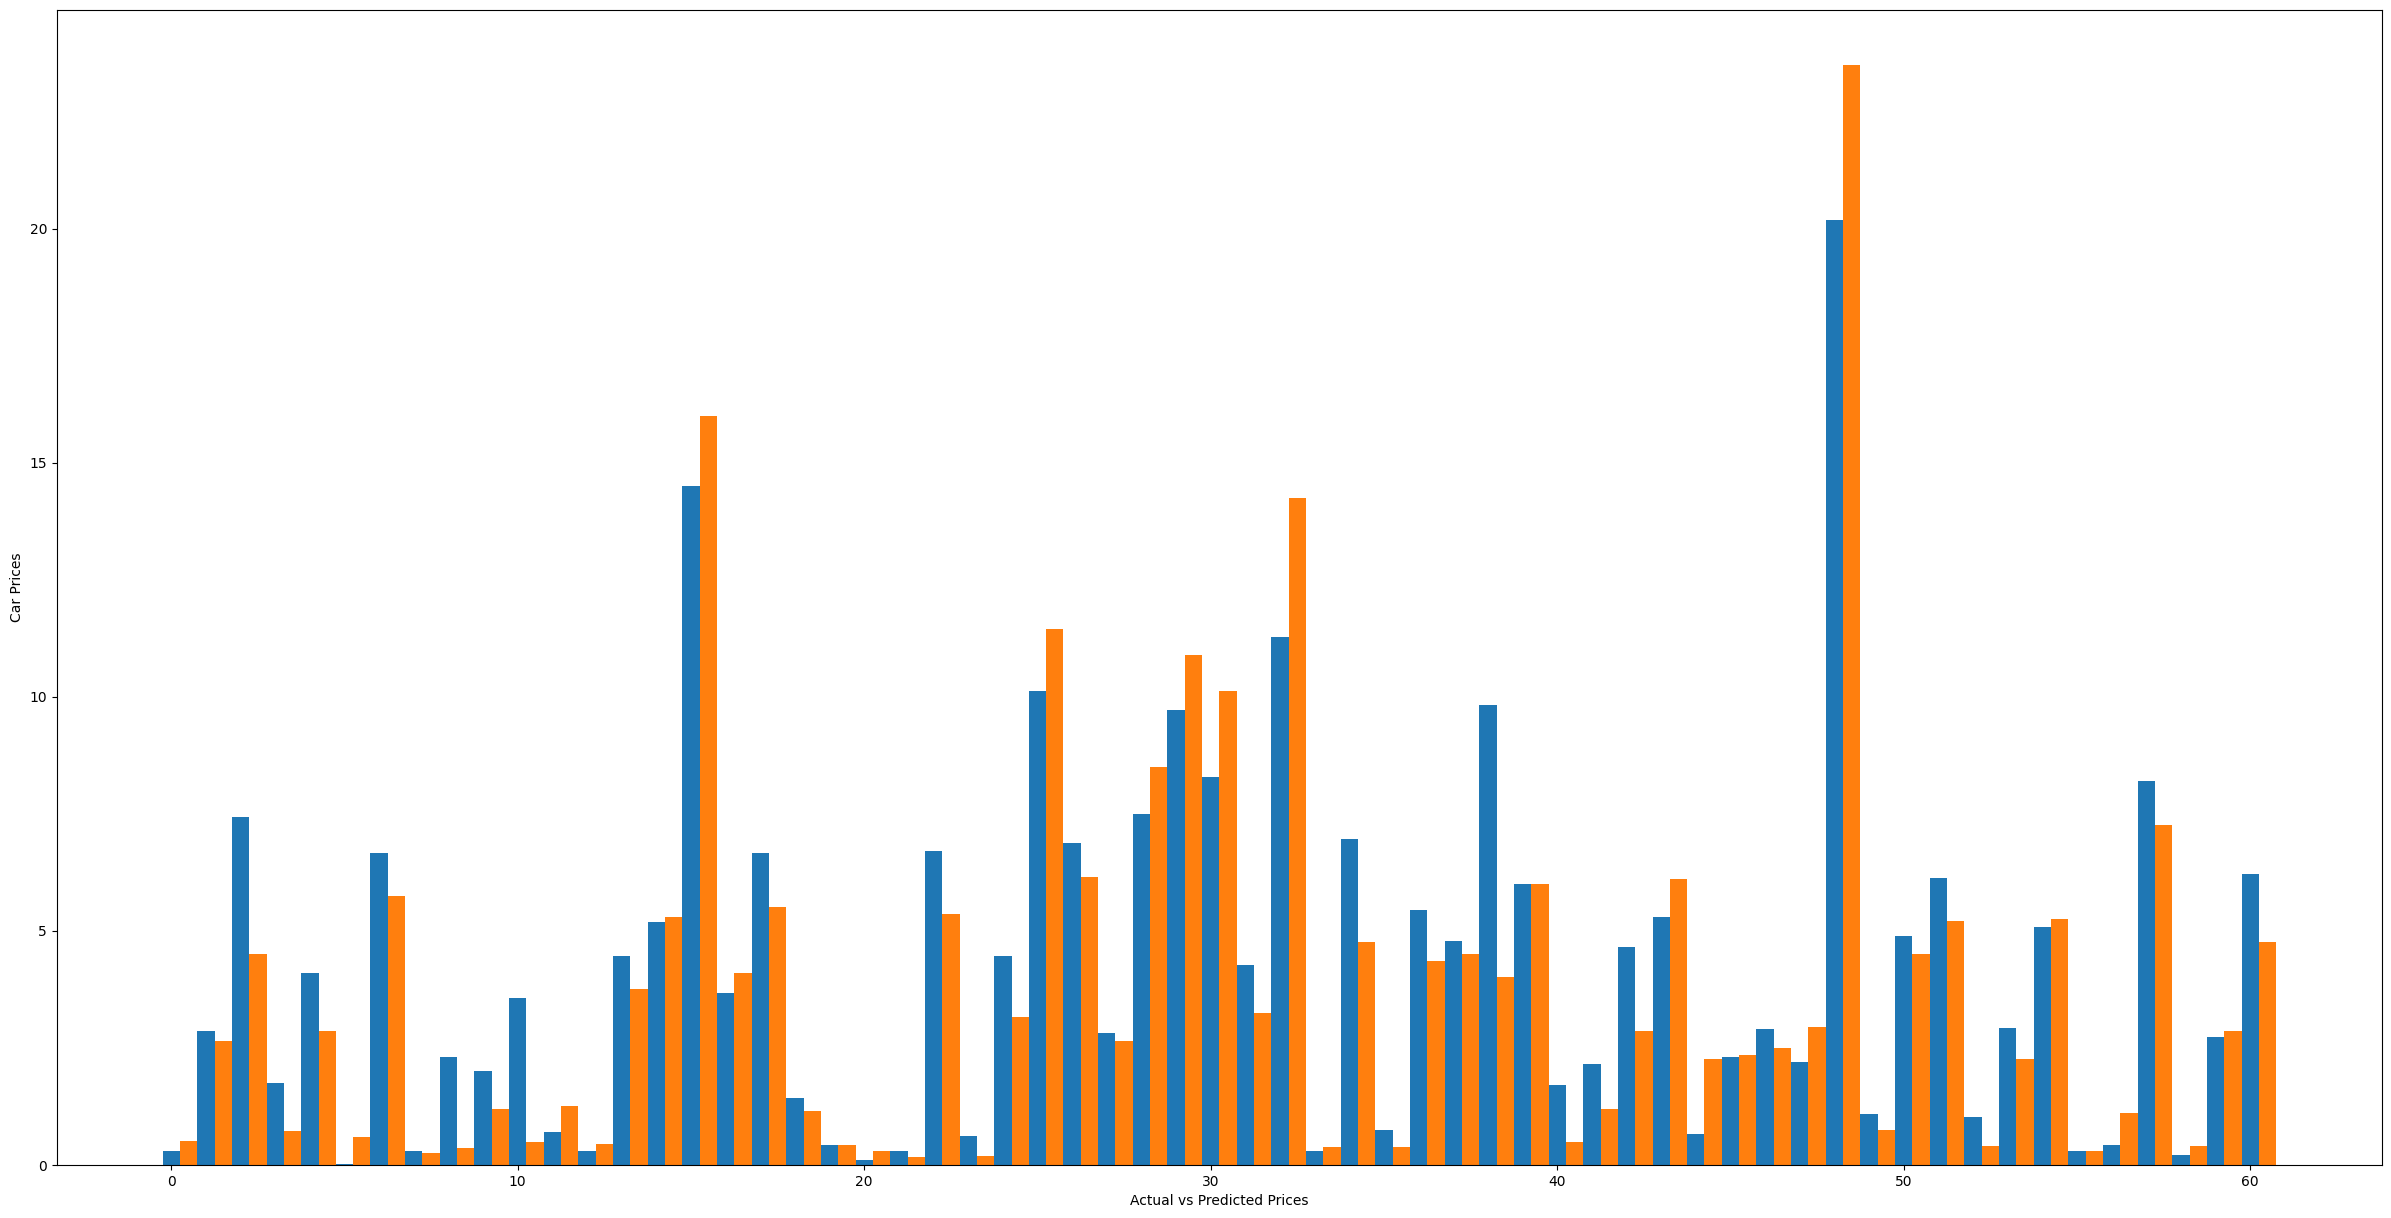

In [41]:
y_true = list(y_test)
prediction = list(model3.predict(x_test))
y_predict = []
for x in prediction:
    if x<0:
        y_predict.append(0.3)
        continue
    y_predict.append(x)
    
ind = np.arange(61)
plt.figure(figsize = (30,15))

width = 0.5

plt.bar(ind,y_predict,width,label = 'Predicted Car Price')
plt.bar(ind+width,y_true,width,label = 'Actual Car Price')

plt.xlabel('Actual vs Predicted Prices')
plt.ylabel('Car Prices')

plt.show()

#### Random Forest Regression Model Evaluation

In [42]:
with open('random_forest_regression_model.p', 'rb') as file:
    model4 = pickle.load(file)

In [43]:
model4.score(x_train,y_train)

0.9872755185718951

In [44]:
model4.score(x_test,y_test)

0.9766795012734626

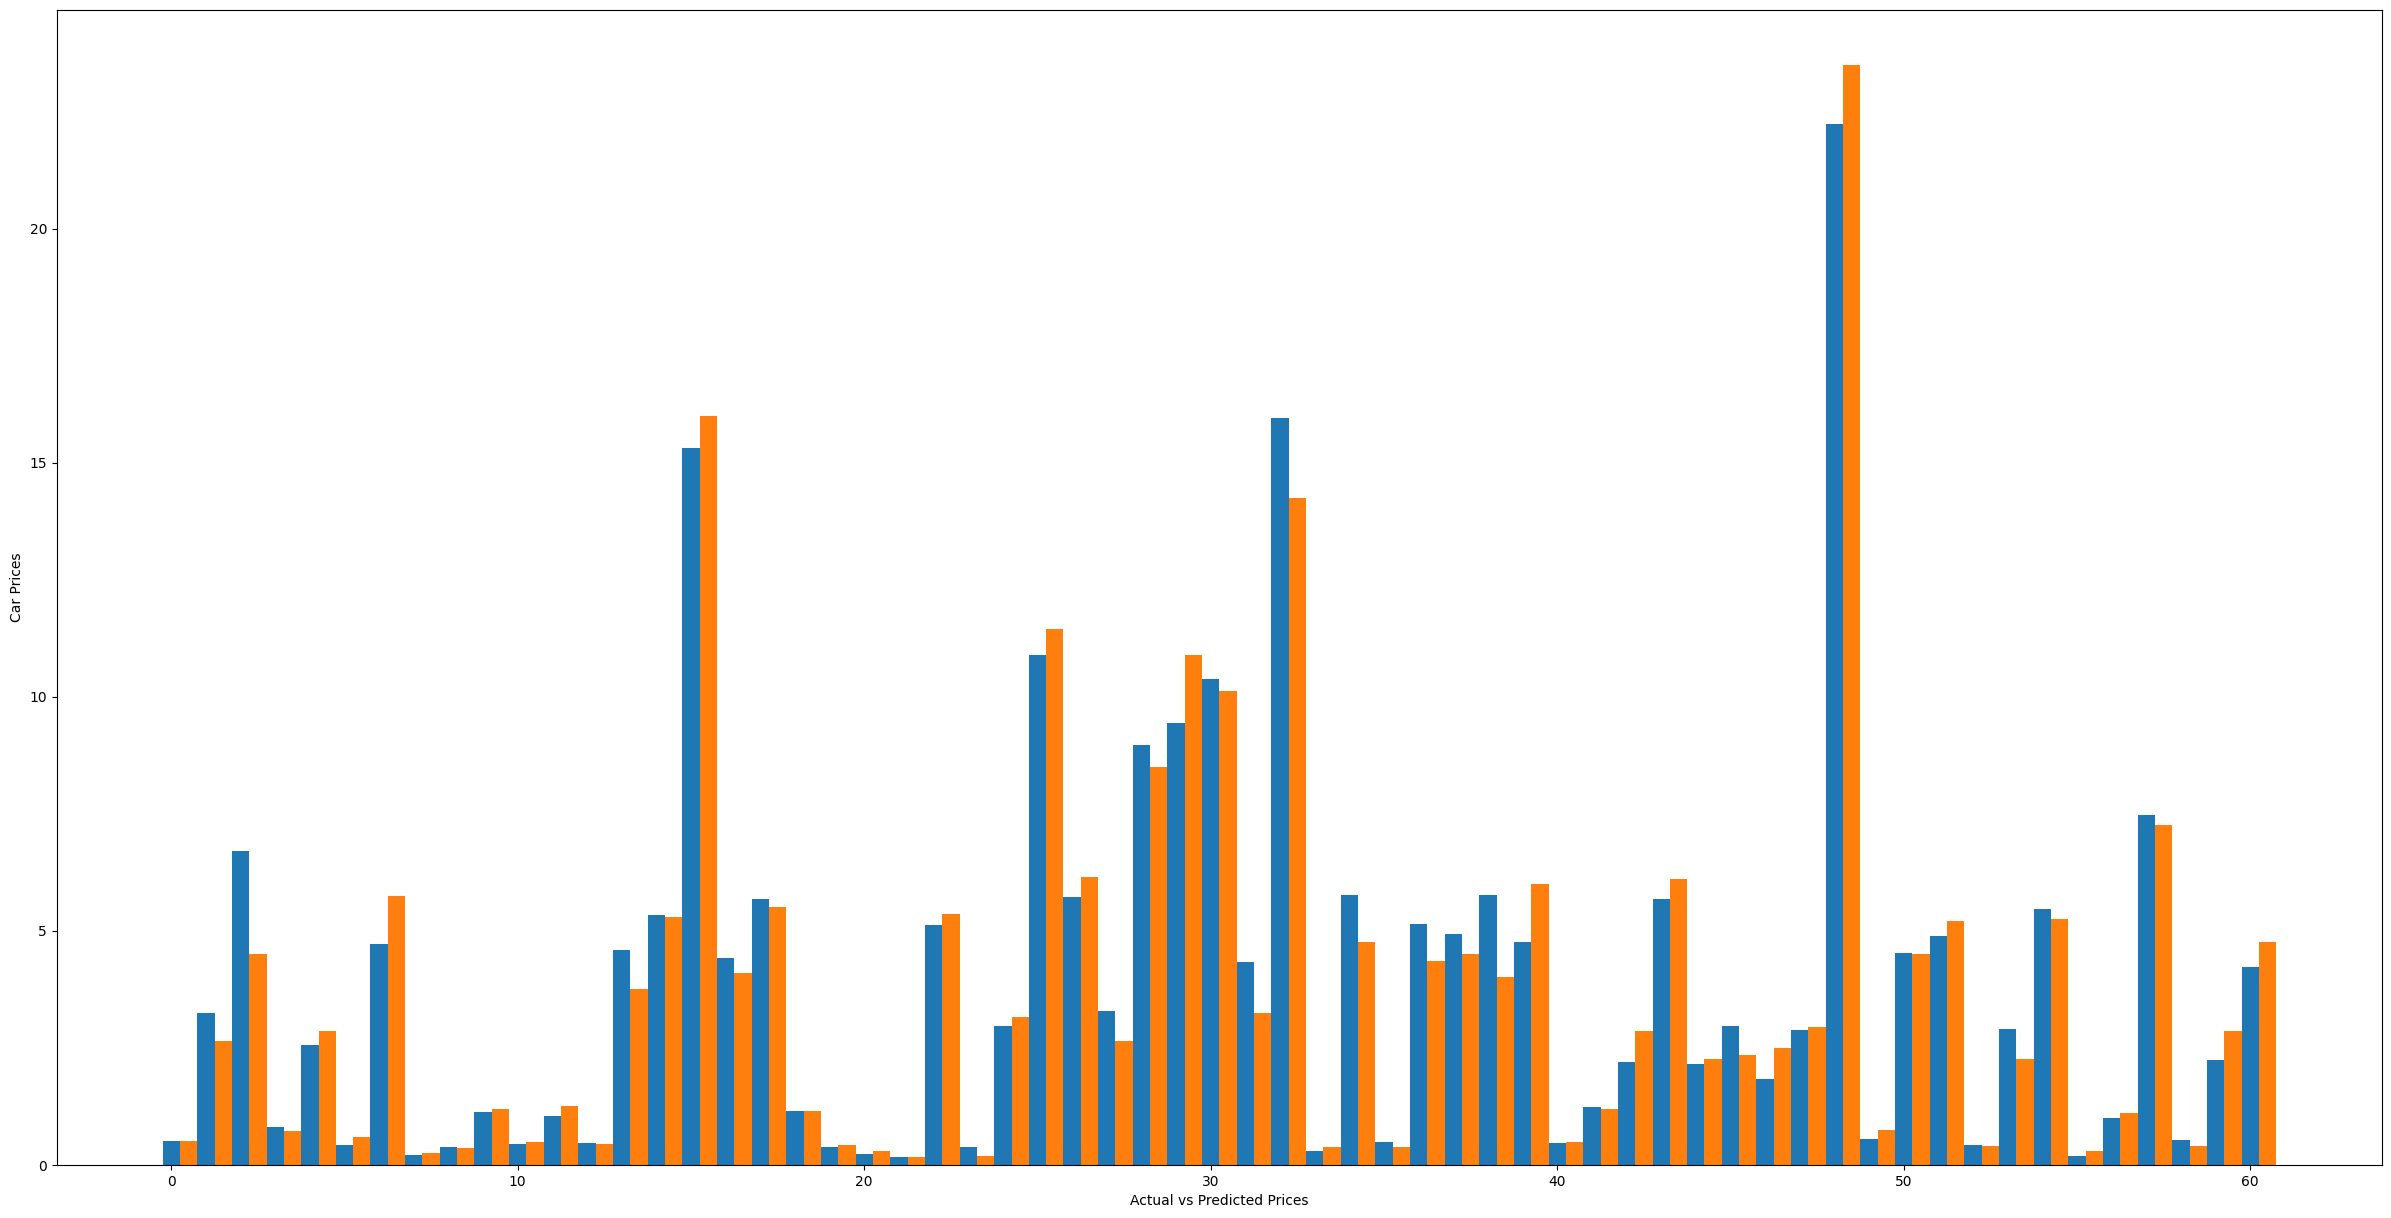

In [45]:
y_true = list(y_test)
prediction = list(model4.predict(x_test))
y_predict = []
for x in prediction:
    if x<0:
        y_predict.append(0.3)
        continue
    y_predict.append(x)
    
ind = np.arange(61)
plt.figure(figsize = (30,15))

width = 0.5

plt.bar(ind,y_predict,width,label = 'Predicted Car Price')
plt.bar(ind+width,y_true,width,label = 'Actual Car Price')

plt.xlabel('Actual vs Predicted Prices')
plt.ylabel('Car Prices')

plt.show()

#### Gradient Boosting Regression Model

In [46]:
with open('gradient_boosting_regression_model.p', 'rb') as file:
    model5 = pickle.load(file)

In [47]:
model5.score(x_train,y_train)

0.999996394134159

In [48]:
model5.score(x_test,y_test)

0.9656738919010533

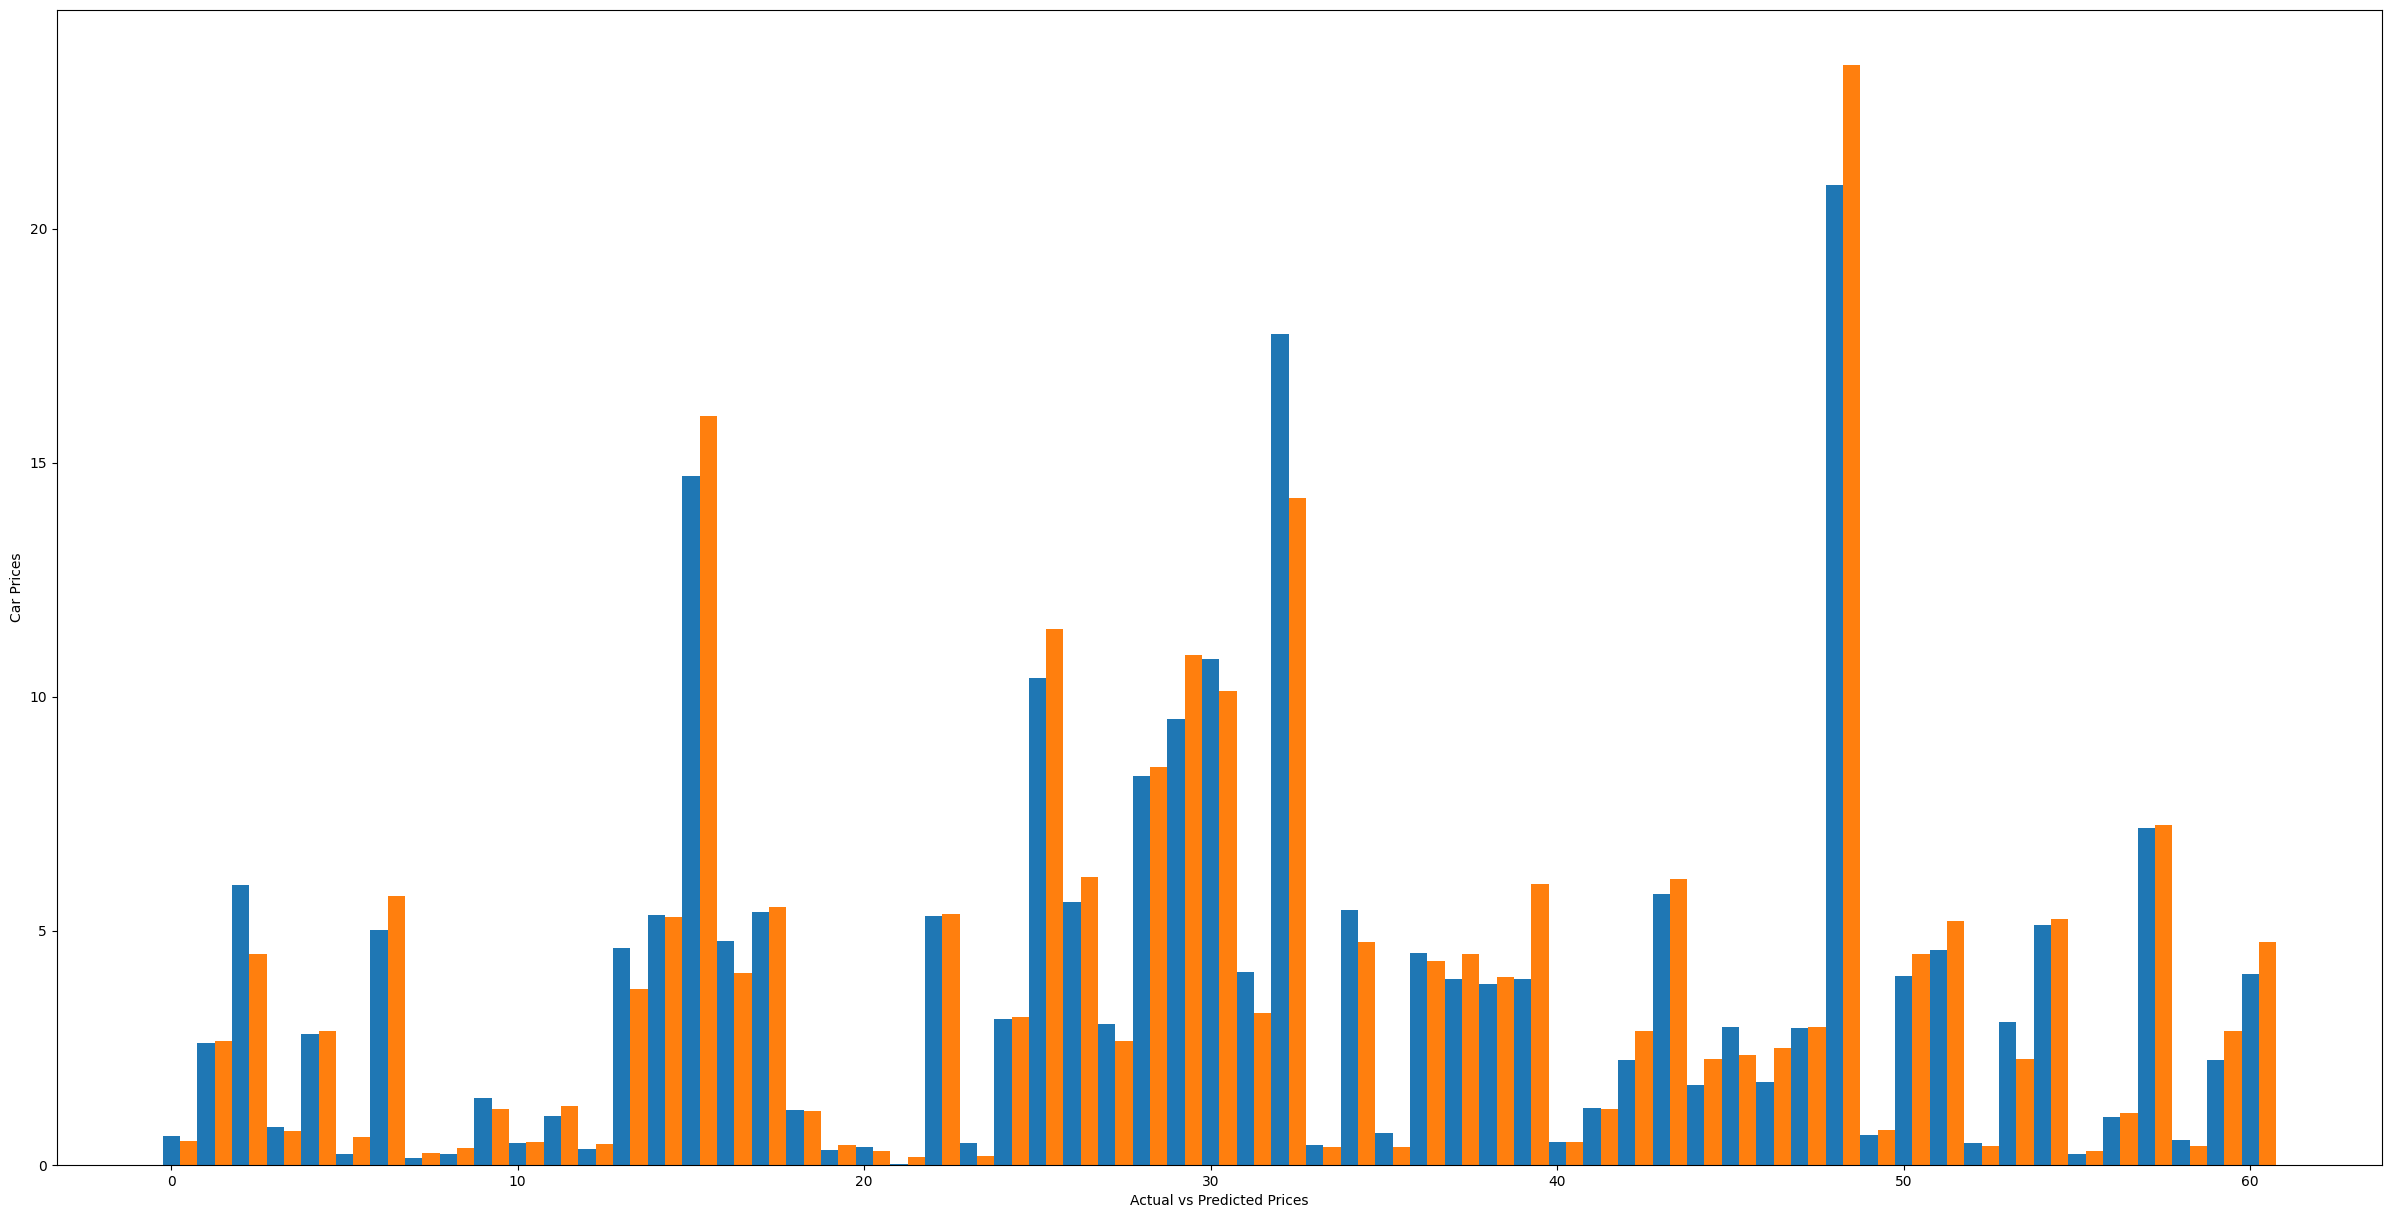

In [49]:
y_true = list(y_test)
prediction = list(model5.predict(x_test))
y_predict = []
for x in prediction:
    if x<0:
        y_predict.append(0.3)
        continue
    y_predict.append(x)
    
ind = np.arange(61)
plt.figure(figsize = (30,15))

width = 0.5

plt.bar(ind,y_predict,width,label = 'Predicted Car Price')
plt.bar(ind+width,y_true,width,label = 'Actual Car Price')

plt.xlabel('Actual vs Predicted Prices')
plt.ylabel('Car Prices')

plt.show()